In [4]:
library(tidyverse)

# 1번 

‘dt.csv’ 데이터를 이용하여 회귀모형을 적합하려고 한다. 이는 매장별 유아 카시트 판매액(Sales)를 예측하기
위한 데이터 이다. 다음 물음에 답하여라. (R을 이용하여 풀이)(검정에서는 유의수준 $α = 0.05$ 사용)

## (1) 

이 데이터의 산점도 행렬을 그리시오.

In [10]:
dt <- read_csv('dt.csv')
head(dt)

Rows: 400 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): Sales, CompPrice, Income, Advertising, Population, Price, Age, Educ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9.50,138,73,11,276,120,42,17
11.22,111,48,16,260,83,65,10
10.06,113,35,10,269,80,59,12
7.40,117,100,4,466,97,55,14
4.15,141,64,3,340,128,38,13
10.81,124,113,13,501,72,78,16


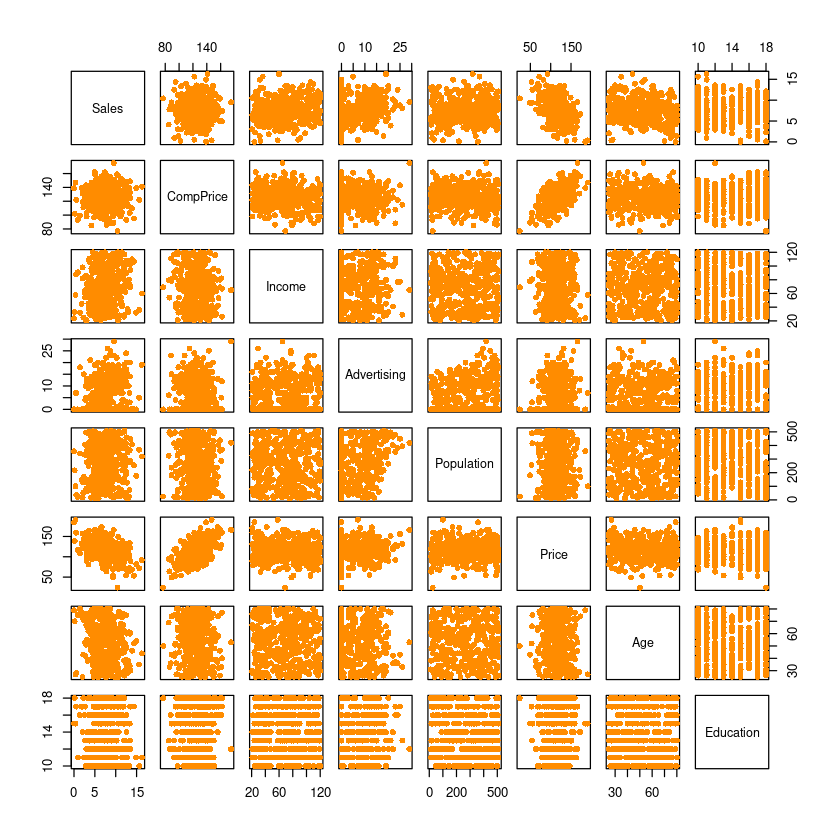

In [11]:
pairs(dt, pch=16, col='darkorange')


- 선형관계가 있어보이는 데이터는, "sales와 price","compprice와 porice", 

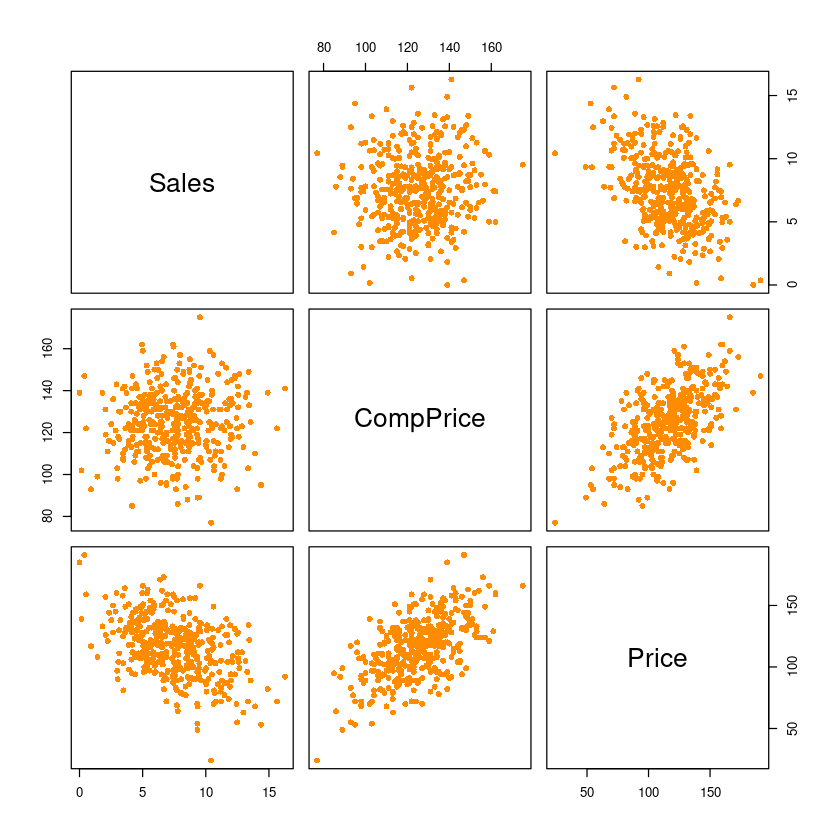

In [12]:
pairs(dt[,which(names(dt) %in% 
                      c('Sales', 'CompPrice', 'Price'))], 
      pch=16, col='darkorange')

In [13]:
cor(dt[,which(names(dt) %in% 
                      c('Sales', 'CompPrice', 'Price'))])

,Sales,CompPrice,Price
Sales,1.00000000,0.06407873,-0.4449507
CompPrice,0.06407873,1.00000000,0.5848478
Price,-0.44495073,0.58484777,1.0000000


- 2,3번 문제에서 축소모형 하니까.. 1번 문제에서는 걍 전체로 돌리자 

## (2) 

Sales를 예측하기 위한 중회귀분석을 하려고 한다. 이를 위한 모형을 설정하시오.

In [57]:
fit_dt<-lm(Sales~., data=dt)
summary(fit_dt)


Call:
lm(formula = Sales ~ ., data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0598 -1.3515 -0.1739  1.1331  4.8304 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.7076934  1.1176260   6.896 2.15e-11 ***
CompPrice    0.0939149  0.0078395  11.980  < 2e-16 ***
Income       0.0128717  0.0034757   3.703 0.000243 ***
Advertising  0.1308637  0.0151219   8.654  < 2e-16 ***
Population  -0.0001239  0.0006877  -0.180 0.857092    
Price       -0.0925226  0.0050521 -18.314  < 2e-16 ***
Age         -0.0449743  0.0060083  -7.485 4.75e-13 ***
Education   -0.0399844  0.0371257  -1.077 0.282142    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.929 on 392 degrees of freedom
Multiple R-squared:  0.5417,	Adjusted R-squared:  0.5335 
F-statistic: 66.18 on 7 and 392 DF,  p-value: < 2.2e-16


$\widehat {Sales} = 7.7076934 +  0.0939149 \widehat {CompPrice} + 0.012871 \widehat {Income} +0.1308637 \widehat {Advertising} -0.0001239  \widehat {Population} -0.0925226 \widehat {Price} -0.0449743 \widehat {Age} -0.0399844 \widehat {Education}$

In [56]:
fit__<-lm(Sales~CompPrice+Price, data=dt)
summary(fit__)



Call:
lm(formula = Sales ~ CompPrice + Price, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5285 -1.6207 -0.2404  1.5269  6.2437 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.278692   0.932774   6.731 5.91e-11 ***
CompPrice    0.090777   0.009132   9.941  < 2e-16 ***
Price       -0.087458   0.005914 -14.788  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.269 on 397 degrees of freedom
Multiple R-squared:  0.3578,	Adjusted R-squared:  0.3546 
F-statistic: 110.6 on 2 and 397 DF,  p-value: < 2.2e-16


$\widehat {Sales} = 6.278692 + 0.090777 \widehat {CompPrice}  -0.087458 \widehat {Price}$

## (3) 

최소제곱법의 의한 회귀직선을 적합시키시키고, 모형 적합 결과를 설명하시오.

## (4)

회귀직선의 유의성 검정을 위한 가설을 설정하고, 분산분석표를 이용하여 가설 검정을 수행하시오.

$H_0:\beta_0=\dots=\beta_7=0$ vs. $H_1:not H_0$

In [58]:
anova(fit_dt)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
CompPrice,1,13.0666859,13.0666859,3.5117751,6.167778e-02
Income,1,79.0733616,79.0733616,21.2515906,5.458487e-06
Advertising,1,219.3512681,219.3512681,58.9523862,1.300900e-13
Population,1,0.3824026,0.3824026,0.1027737,7.486970e-01
Price,1,1198.8668836,1198.8668836,322.2049460,5.144277e-53
Age,1,208.6564283,208.6564283,56.0780635,4.652175e-13
Education,1,4.3158913,4.3158913,1.1599299,2.821424e-01
Residuals,392,1458.5617763,3.7208209,NA,NA


In [72]:
null_model <- lm(Sales~1, data=dt)  
fit_dt <- lm(Sales~., data=dt) 

anova(null_model, fit_dt) 

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,399,3182.275,NA,NA,NA,NA
2,392,1458.562,7,1723.713,66.18021,1.413772e-62


- 회귀직선은 유의하다.

In [73]:
(1723.713/7)/(1458.562/392)

[1] 66.1802

## (5)

오차의 분산에 대한 추정량을 구하시오.

### matrix

In [20]:
n = nrow(dt)
X = cbind(rep(1,n), dt$CompPrice, dt$Income, dt$Advertising, dt$Population, dt$Price, dt$Age, dt$Education)
y = dt$Sales

In [23]:
beta_hat = solve(t(X)%*%X) %*% t(X) %*% y   # t(X): X^T를 의미함 
beta_hat
coef(fit_dt)

7.7076934384
0.0939149066
0.0128717129
0.1308636707
-0.0001239252
-0.0925226099
-0.0449743402
-0.0399844437


(Intercept)     CompPrice        Income   Advertising    Population 
 7.7076934384  0.0939149066  0.0128717129  0.1308636707 -0.0001239252 
        Price           Age     Education 
-0.0925226099 -0.0449743402 -0.0399844437

In [24]:
y_hat = X %*% beta_hat
y_hat[1:5]
fitted(fit_dt)[1:5]

[1] 9.341512 9.809135 9.510780 8.440550 8.052225

1        2        3        4        5 
9.341512 9.809135 9.510780 8.440550 8.052225

In [74]:
sse <- sum((y - y_hat)^2) ##SSE
sqrt(sse/(n-7-1)) ##RMSE
summary(fit_dt)$sigma

[1] 1.928943

[1] 1.928943

In [80]:
mse <- sse/(n-7-1)
mse

[1] 3.720821

## (6)

결정계수와 수정된 결정계수를 구하시오.

In [26]:
summary(fit_dt)


Call:
lm(formula = Sales ~ ., data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0598 -1.3515 -0.1739  1.1331  4.8304 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.7076934  1.1176260   6.896 2.15e-11 ***
CompPrice    0.0939149  0.0078395  11.980  < 2e-16 ***
Income       0.0128717  0.0034757   3.703 0.000243 ***
Advertising  0.1308637  0.0151219   8.654  < 2e-16 ***
Population  -0.0001239  0.0006877  -0.180 0.857092    
Price       -0.0925226  0.0050521 -18.314  < 2e-16 ***
Age         -0.0449743  0.0060083  -7.485 4.75e-13 ***
Education   -0.0399844  0.0371257  -1.077 0.282142    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.929 on 392 degrees of freedom
Multiple R-squared:  0.5417,	Adjusted R-squared:  0.5335 
F-statistic: 66.18 on 7 and 392 DF,  p-value: < 2.2e-16


- $R^2:0.5417, R^2_{adj}: 0.5335$

## (7)

개별 회귀계수의 유의성검정을 수행하시오.

In [28]:
summary(fit_dt)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),7.7076934384,1.1176259965,6.8964873,2.145154e-11
CompPrice,0.0939149066,0.0078395225,11.9796718,2.153866e-28
Income,0.0128717129,0.0034756701,3.7033759,2.432641e-04
Advertising,0.1308636707,0.0151219066,8.6539134,1.302560e-16
Population,-0.0001239252,0.0006877272,-0.1801952,8.570924e-01
Price,-0.0925226099,0.0050520870,-18.3137403,1.409811e-54
Age,-0.0449743402,0.0060082977,-7.4853715,4.751078e-13
Education,-0.0399844437,0.0371257460,-1.0770004,2.821424e-01


## (8)

회귀계수에 대한 90% 신뢰구간을 구하시오.

In [61]:
confint(fit_dt, level = 0.90)

,5 %,95 %
(Intercept),5.865007519,9.550379358
CompPrice,0.080989493,0.106840320
Income,0.007141202,0.018602224
Advertising,0.105931426,0.155795915
Population,-0.001257815,0.001009965
Price,-0.100852239,-0.084192981
Age,-0.054880521,-0.035068159
Education,-0.101195519,0.021226632


## (9)

CompPrice = 100, Income = 70, Advertising = 20, Population = 300, Price = 80, Education = 12인 지역에 위치한 매장의 평균 판매액을 예측하고, 95% 신뢰구간을 구하시오.

In [63]:
new_dt <- data.frame(CompPrice=100, Income=70, Advertising=20, Population=300, Price=80, Age=53, Education=12)

In [64]:
predict(fit_dt, 
        newdata = new_dt,
        interval = c("confidence"), 
        level = 0.95)  ##평균반응

,fit,lwr,upr
1,10.31504,9.746147,10.88393


- 문제에서 Age에 대한 값이 명시되지 않아서.. 일단 age는 평균 값 넣어서 계산함

## (10)

위 매장에 대하여 개별 판매액 예측하고, 95% 신뢰구간을 구하시오.

In [65]:
predict(fit_dt, newdata = new_dt, 
        interval = c("prediction"), 
        level = 0.95)  ## 개별 y

,fit,lwr,upr
1,10.31504,6.480238,14.14984


## (11)

잔차에 대한 산점도를 그리고, 결과를 설명하여라.

In [66]:
yhat <- fitted(fit_dt)
res <- resid(fit_dt)

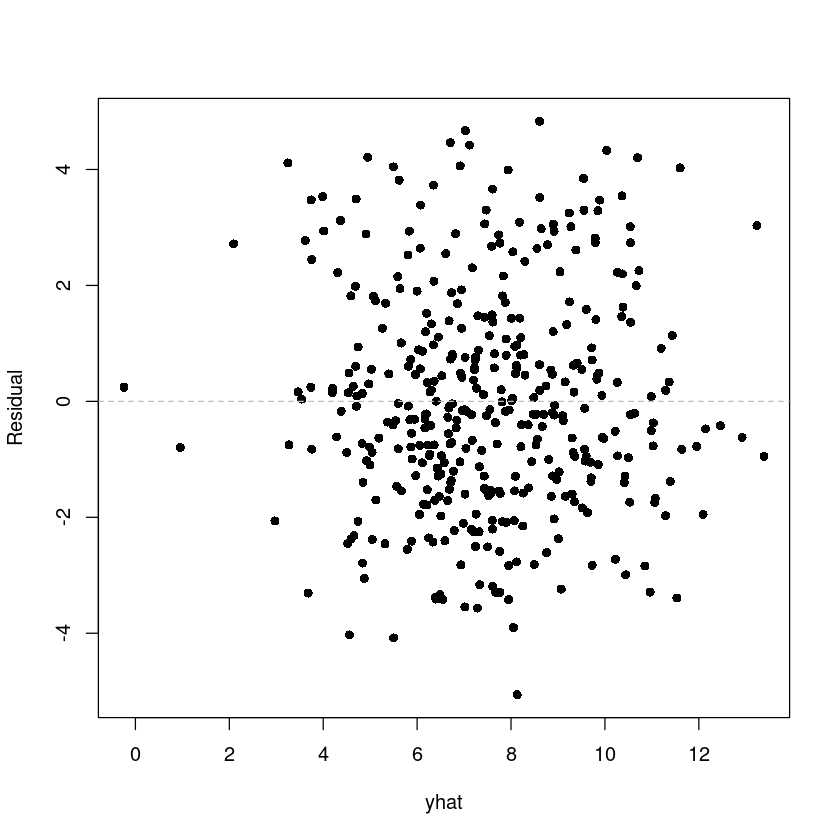

In [67]:
plot(res ~ yhat,pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')

선형성은 없어보이고, 등분산성이 있어보인다.

## (12)

잔차에 대한 등분산성 검정을 수행하여라.

$H_0$:등분산 VS. $H_1$:이분산

In [41]:
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [42]:
bptest(fit_dt)


	studentized Breusch-Pagan test

data:  fit_dt
BP = 1.1751, df = 7, p-value = 0.9915


- p-valeur가 커서 $H_0$를 채택한다. 즉 등분산성이다.

## (13)

잔차에 대한 히스토그램, QQ plot을 그리고, 정규성 검정을 수행하여라.

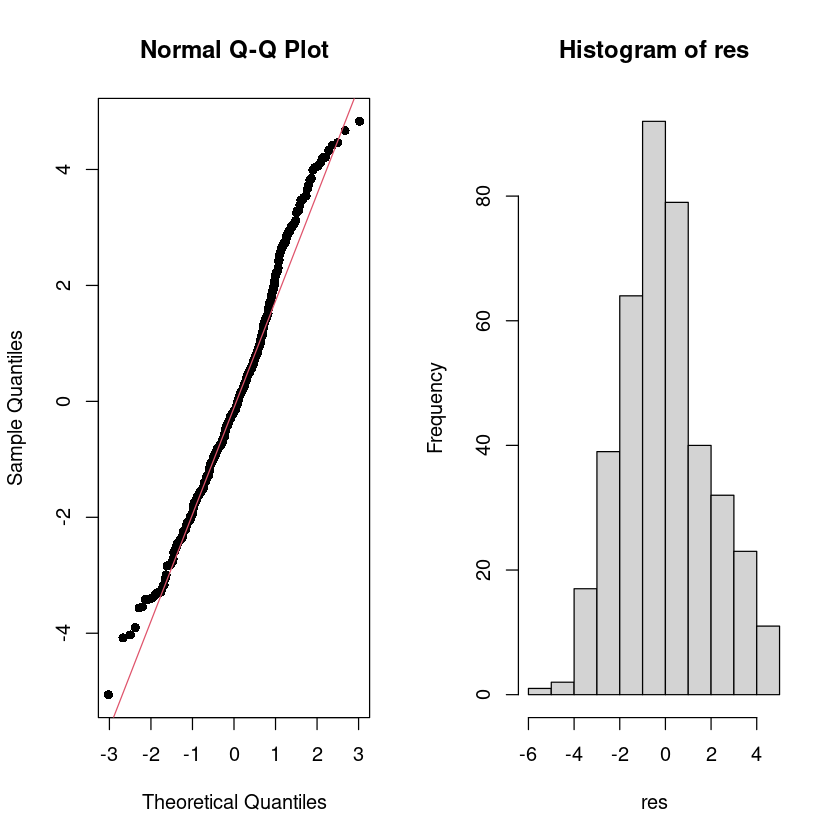

In [68]:
par(mfrow=c(1,2))
qqnorm(res, pch=16)
qqline(res, col = 2)

hist(res)
par(mfrow=c(1,1))

- 정규성을 만족해 보인다.

In [44]:
## H0 : normal distribution  vs. H1 : not H0
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.98602, p-value = 0.0006715


## (14)

잔차에 대한 독립성 검정을 수행하시오.

$H_0$:uncorrelated

In [69]:
dwtest(fit_dt, alternative = "two.sided") 


	Durbin-Watson test

data:  fit_dt
DW = 1.9694, p-value = 0.7622
alternative hypothesis: true autocorrelation is not 0


- 독립이다.

# 2번

위 데이터에 대하여 다음 물음에 답하여라. (R을 이용하여 풀이)(검정에서는 유의수준 $α = 0.05$ 사용)


## (1)

위에서 적합한 모형에서 개별 회귀계수의 유의성 검정 결과 유의하지 않은 변수는 무엇인가?

Population, Education은 유의하지 않은 변수이다.

## (2)

위에서 유의하지 않았던 변수를 제외한 모형을 축소모형(Reduced Model)으로 하는 부분 F검정을 수행하여라. 검정에 필요한 가설을 설정하고, 검정 결과를 설명하시오.

In [89]:
reduced_model<-lm(Sales~.-Population-Education, data=dt)


In [50]:
anova(reduced_model, fit_dt)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,394,1462.897,NA,NA,NA,NA
2,392,1458.562,2,4.335087,0.5825445,0.5589583


## (3)

1번에서 설정한 모형과, 축소모형 중 어느 모형이 이 데이터에 대한 설명을 잘 하고 있는지를 비교하시오.

In [90]:
summary(reduced_model)
summary(fit_dt)


Call:
lm(formula = Sales ~ . - Population - Education, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9071 -1.3081 -0.1892  1.1495  4.6980 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.109190   0.943940   7.531 3.46e-13 ***
CompPrice    0.093904   0.007792  12.051  < 2e-16 ***
Income       0.013092   0.003465   3.779 0.000182 ***
Advertising  0.130611   0.014572   8.963  < 2e-16 ***
Price       -0.092543   0.005044 -18.347  < 2e-16 ***
Age         -0.044971   0.005994  -7.503 4.20e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.927 on 394 degrees of freedom
Multiple R-squared:  0.5403,	Adjusted R-squared:  0.5345 
F-statistic: 92.62 on 5 and 394 DF,  p-value: < 2.2e-16



Call:
lm(formula = Sales ~ ., data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0598 -1.3515 -0.1739  1.1331  4.8304 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.7076934  1.1176260   6.896 2.15e-11 ***
CompPrice    0.0939149  0.0078395  11.980  < 2e-16 ***
Income       0.0128717  0.0034757   3.703 0.000243 ***
Advertising  0.1308637  0.0151219   8.654  < 2e-16 ***
Population  -0.0001239  0.0006877  -0.180 0.857092    
Price       -0.0925226  0.0050521 -18.314  < 2e-16 ***
Age         -0.0449743  0.0060083  -7.485 4.75e-13 ***
Education   -0.0399844  0.0371257  -1.077 0.282142    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.929 on 392 degrees of freedom
Multiple R-squared:  0.5417,	Adjusted R-squared:  0.5335 
F-statistic: 66.18 on 7 and 392 DF,  p-value: < 2.2e-16


# 3번

1번에서 설정한 모형에 대하여 아래의 일반 선형 가설검정(General Linear Hypothesis Test)을 수행하시오.
(R을 이용하여 풀이)(검정에서는 유의수준 $α = 0.05$ 사용)(회귀계수는 $β_i$로 표현해야 하지만, 각자 설정이
다를 수가 있기 때문에 회귀계수 대신 변수 이름을 사용하겠음. 예 $β_1 =CompPrice$)

## (1)

$H_0 : CompPrice=Income$ vs. $H_1 : not H_0$

In [54]:
install.packages("car")

Installing package into ‘/home/coco/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



```R
linearHypothesis(dt_fit, c(0,1,-1,0,0,0,0,0),0)
```

## (2)

$H_0 : CompPrice=-Price$ vs. $H_1 : not H_0$

```R
linearHypothesis(fit_dt, c(0,1,0,0,0,1,0,0),0)
```

## (3)

$H_0$를 기각할 수 있는 제약조건을 만들어 보시오.(단 2개 이상의 변수 사용)